In [12]:
import pandas as pd 
df=pd.read_csv("titanic-passengers.csv", sep=";")


def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(df)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [23]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
clf = DecisionTreeClassifier(random_state=1234)
#model = tree.DecisionTreeClassifier()  
model=clf.fit(x_train, y_train)   #fitting our model
y_pred=model.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.770949720670391


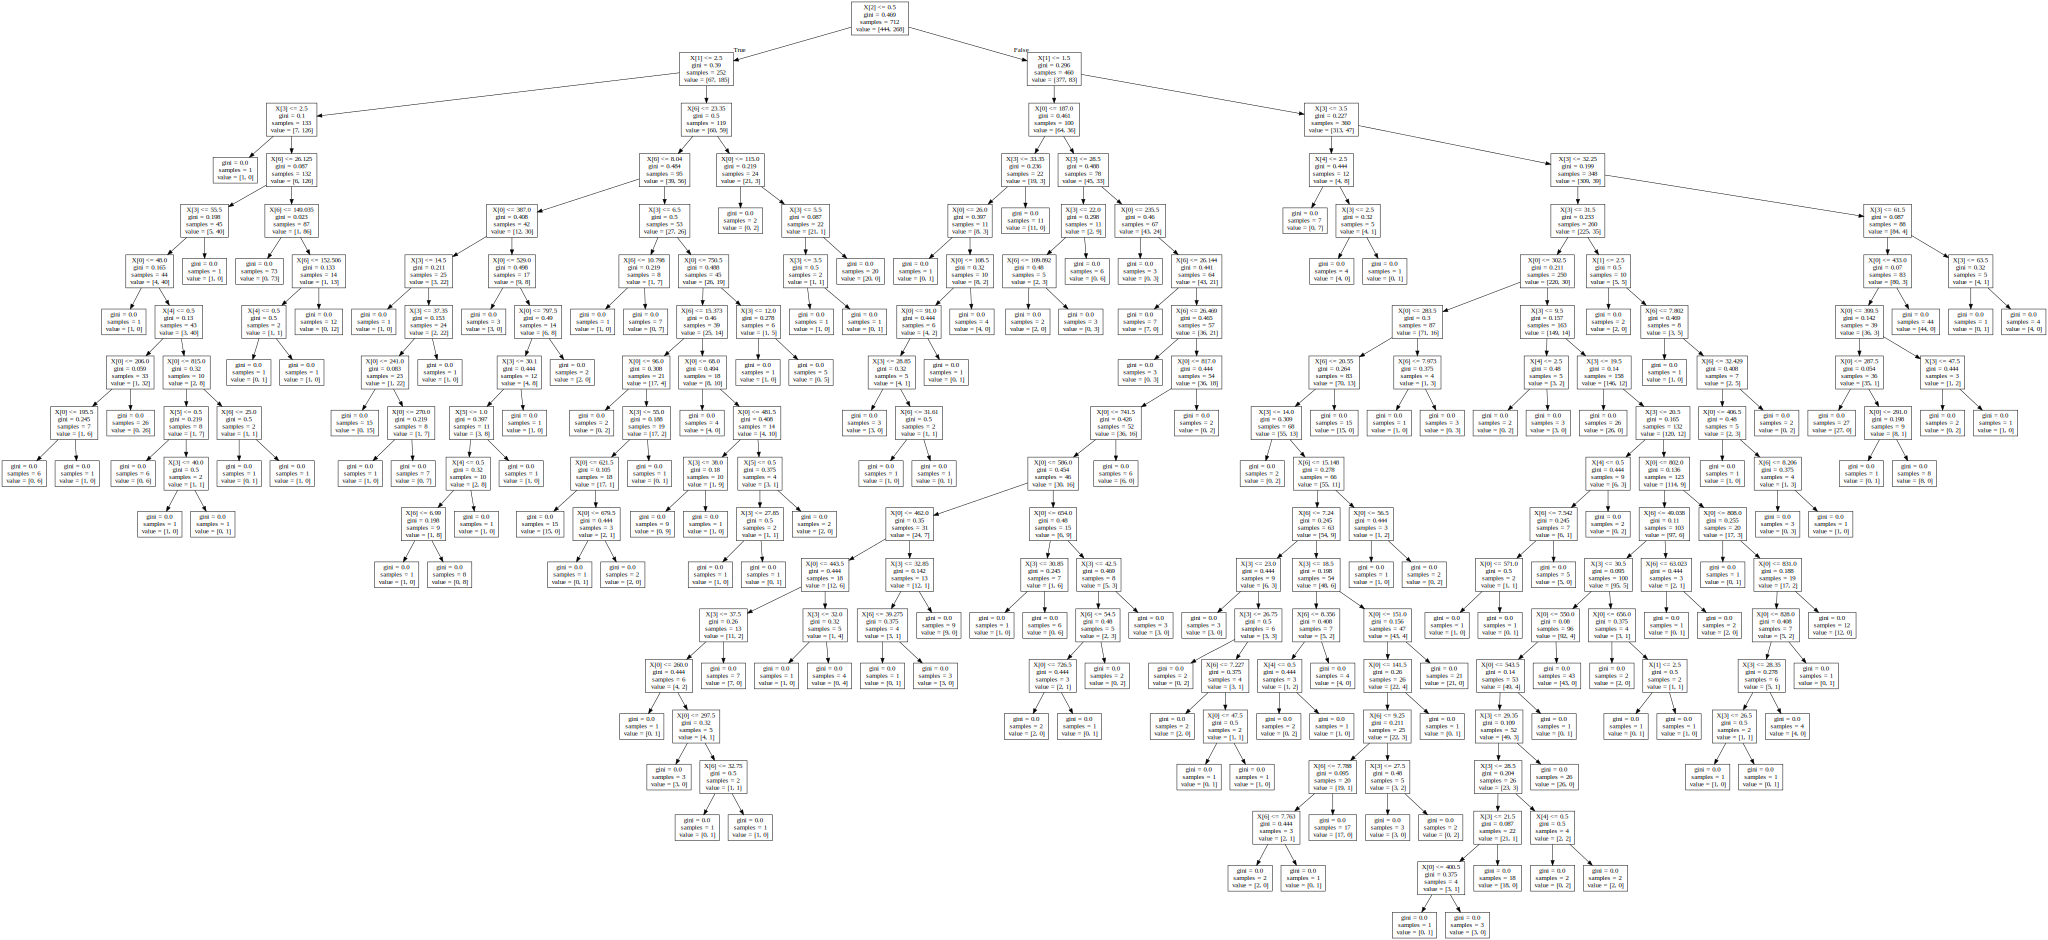

In [25]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None)
# Draw graph
graph = graphviz.Source(dot_data) 
graph.render()
graph

In [32]:
dtree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10
                                    , min_samples_leaf = 5, max_depth= 5)
model1=dtree.fit(x_train, y_train)   #fitting our model
y_pred=model1.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


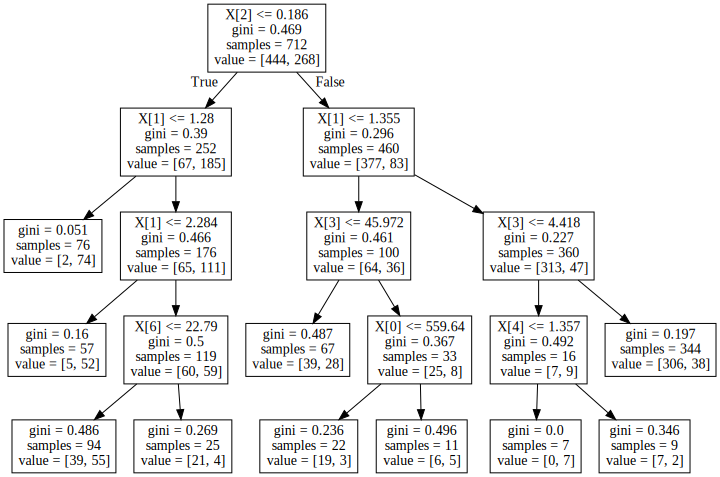

In [31]:
dot_data1 = tree.export_graphviz(dtree, out_file=None)
# Draw graph
graph = graphviz.Source(dot_data1) 
graph.render()
graph

In [33]:
#Random forest****

In [34]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

iris = datasets.load_iris()

data=pd.DataFrame({
'sepal length': iris.data[:,0],
'sepal width': iris.data[:,1],
'petal length': iris.data[:,2],
'petal width': iris.data[:,3], 
'species': iris.target
})

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']] #features
y=data['species']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%

In [35]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.9555555555555556
